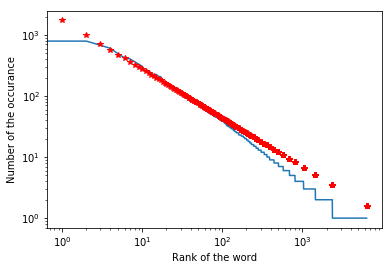

In [148]:
import matplotlib.pyplot as plt
import math
fp=open('Alice.txt','r',encoding='UTF-8')
line=fp.readline()
my_dict={}
while line:
    s=line.split()
    for x in s:
        if x not in my_dict:
            my_dict[x]=1
        else:
            my_dict[x]=my_dict[x]+1
    line=fp.readline()
    
fp.close()

num=[]
for key in my_dict:
    num.append(my_dict[key])
    
#print(len(num))
num.sort()
num.reverse()

a=plt.loglog(range(len(num)),num)

def whateveryoucallit(num):

    copynum = num[:]
    copynum.sort(reverse=True)
    dic = { v:i+1 for i,v in enumerate(copynum) }
    return [ dic[v] for i,v in enumerate(num) ]

r = whateveryoucallit(num)


#print(r)

from scipy import optimize

def test_func(x,amp,alpha):
    return amp*x**alpha
params,params_covariance=optimize.curve_fit(test_func,r,num)
#print(params,params_covariance)
plt.plot(r,test_func(r,params[0],params[1]),"r*",label='Fitted function')

plt.xlabel('Rank of the word')
plt.ylabel('Number of the occurance')
plt.show()